In [1]:
# Read the tick data
import pandas as pd
df = pd.read_csv("../ticks.csv")
df['timestamp'] = df['timestamp'].astype(int)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.head()

,timestamp,kind,market,asset,side,price,size
0,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,1084684166686630171332987414854531251509528221...,SELL,0.18,4587.95
1,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,1084684166686630171332987414854531251509528221...,BUY,0.17,3347.12
2,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,4775707963389438711229198708381022564225823811...,SELL,0.83,3347.12
3,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,4775707963389438711229198708381022564225823811...,BUY,0.82,4587.95
4,2025-06-27 18:01:28.300,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,1084684166686630171332987414854531251509528221...,SELL,0.18,4378.59


In [2]:
# Use IDs discovered by the CLI tool
market = "Will Iran close the Strait of Hormuz in 2025?"
market_id = "0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a065be0706453857dc0958"
outcomes = {
    "108468416668663017133298741485453125150952822149773262784582671647441799250111": "YES",
    "47757079633894387112291987083810225642258238114957712348556688720736895499502": "NO"
}

df = df[df['market'] == market_id]
df['asset'] = df["asset"].apply(lambda x: outcomes[x])
df.head()

,timestamp,kind,market,asset,side,price,size
0,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,YES,SELL,0.18,4587.95
1,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,YES,BUY,0.17,3347.12
2,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,NO,SELL,0.83,3347.12
3,2025-06-27 18:00:46.743,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,NO,BUY,0.82,4587.95
4,2025-06-27 18:01:28.300,BBO,0x89ff77ee1c11d6c8a480bfaab11eefd6f87b8f2076a0...,YES,SELL,0.18,4378.59


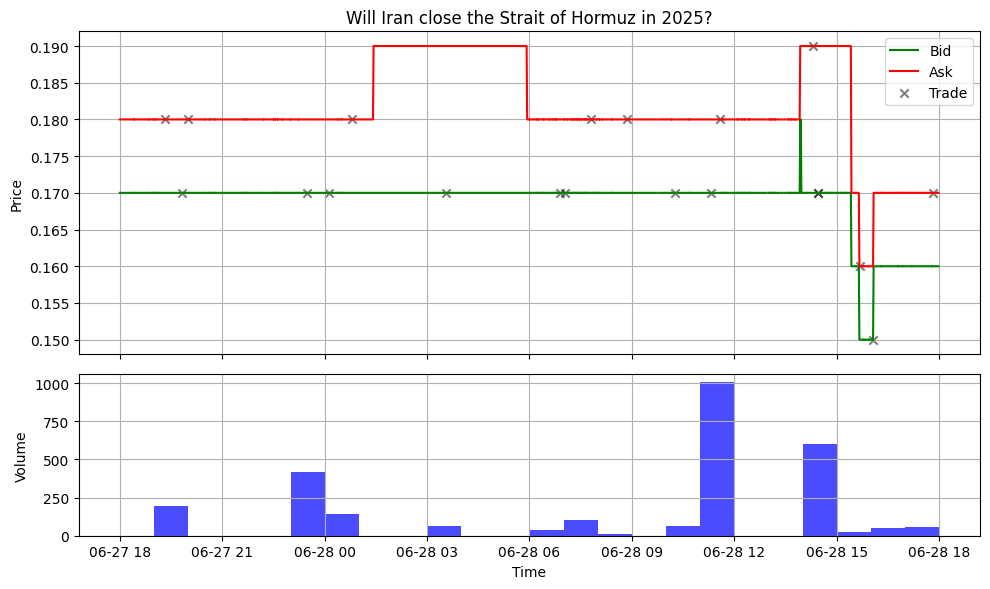

In [3]:
import matplotlib.pyplot as plt

# Limit to YES tokens for simplicity
df = df[df['asset'] == "YES"]

# Sample 1-minute BBO
bbo = df[df['kind'] == 'BBO'].copy()
bbo.set_index('timestamp', inplace=True)
bids = bbo[bbo['side'] == 'BUY'].resample('1min').last()["price"]
asks = bbo[bbo['side'] == 'SELL'].resample('1min').last()["price"]

# Aggregate 1-hour volume bars
volume = df[df['kind'] == 'TRADE'].copy()
volume.set_index('timestamp', inplace=True)
volbars = volume.resample('1h').sum()["size"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plot bid/ask lines
ax1.plot(bids.index, bids.values, label='Bid', color='green')
ax1.plot(asks.index, asks.values, label='Ask', color='red')

# Draw invidiual trades as Xs
trades = df[df['kind'] == 'TRADE'].copy()
trades.set_index('timestamp', inplace=True)
ax1.scatter(trades.index, trades['price'], color='black', alpha=0.5, marker='x', label='Trade')

ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)
ax1.set_title(market)

# Plot volume bars
ax2.bar(volbars.index, volbars.values, width=pd.Timedelta(hours=1), color='blue', alpha=0.7, align='edge')
ax2.set_ylabel("Volume")
ax2.set_xlabel("Time")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [4]:
trades.describe()

,price,size
count,20.000000,20.000000
mean,0.172500,138.912077
std,0.008507,229.787391
min,0.150000,5.555554
25%,0.170000,29.250000
50%,0.170000,59.711764
75%,0.180000,102.777777
max,0.190000,932.388887
